# Decision Trees

We begin our overview of classification and regression methods with one of the most popular ones - a decision tree. Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees. 

In terms of machine learning, one can see it as a simple classifier that determines the appropriate form of and object based on the attributes. A decision tree is often a generalization of the experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively derived rules that could be presented as a decision tree.

## Shannon's Entropy

$$ S = -\sum_{i=1}^N p_i \log_2 p_i $$

where $p_i$ is the probability of finding the system in the i-th state. This is a very important concept used in physics, information theory, and other areas. Entropy can be described as the degree of chaos in the system. The higher the entropy, the less ordered the system and vice versa. This helps us formalize "effective data splitting".

## Toy Example

To illustrate how entropy can help us identify good features for building a decision tree, lets look at a toy example. We will predict the color of the ball based on its position.

<img src="00.01_balls.svg" width="455">

There are 9 blue balls and 11 orange balls. If we randomly pull out a ball, then it will be blue with probability $p_1 = \frac{9}{20}$ and the yellow probability $p_2 = \frac{11}{20}$, which gives us an entropy of $S_0 = -\frac{9}{20} \log_2 \frac{9}{20} - \frac{11}{20} \log_2 \frac{11}{20} \approx 1$. This value may not give us much, but let's see how the value changes if we were to break the balls into two groups: with position less than or equal to 12 and greater than 12.

<img src="00.02_balls_split.svg" width="525" />

The left group has 13 balls, 8 blue and 5 orange. The entropy for this group is $S_1 = -\frac{5}{13} \log_2 \frac{5}{13} -\frac{8}{13} \log_2 \frac{8}{13} \approx 0.96$. The right group, on the other hand, has 7 balls, 1 blue and 6 orange. The entropy for this group is $S_2 = -\frac{1}{7} \log_2 \frac{1}{7} -\frac{6}{7} \log_2 \frac{6}{7} \approx 0.6$. As you can see, entropy has decreased in both groups, more so in the right group. Since entropy is in fact, the degree of chaos (or uncertainty) in the system, the reduction in entropy is called information gain. 

## Information Gain
Formally the information gain (IG) for a split based on the variable $Q$ (in this example "$x \le 12$") is defined as 

$$ IG(Q) = S_o - \sum_{i=1}^q \frac{N_i}{N} S_i $$

where $q$ is the number of groups after the split, $Ni$ is the number of objects from the sample in which variable $Q$ is equal to the $i$-th value. In our example, our split yielded two groups $(q=2)$, one with 13 elements $(N_1=13)$, the other with 7 $(N_2=7)$. Therefore, we can compute the information gain as

$$ IG(Q) = S_0 - \frac{13}{20} S_1 - \frac{7}{20} S_2 \approx 0.16  $$

It seems like dividing the balls into groups by splitting on "coordinate is less than or equal to 12" gave us a more ordered system. Let's continue dividing them into groups until the balls in each group are all the same color

<img src="00.03_balls_split_further.svg" width="630" />

For the right group, we can easily see that we need only one extra partition using "coordinate less than or equal to 18". But for the left group, we need three more. Note that the entropy of a group where all of the balls are the same color is equal to $\log_2 1 = 0$. 

We have successfully created a decision tree that predicts ball color based on position. This decision tree may not work well if we add any balls because it has perfectly fit our training set (initial 20 balls). If we wanted to do well in that case, a tree with fewer questions or splits would be more accurate, even if it does not perfectly fit our training set.

## Tree-building Algorithm

We can make sure that the tree built in the previous example is optimal: it took only 5 questions (splits conditioned on the variable x) to perfectly fit a decision tree to the training set. Under the other split conditions, the resulting tree would be deeper, meaning it will take more questions to reach an answer.

At the heart of the popular algorithms for decision tree construction, such as ID3 or C4.5, lies the principle of greedy maximization of information gain: at each step, the algorithm chooses the variable that gives the greatest information gain upon splitting. Then the procedure is repeated recursively until the entropy is zero (or some small value to account for over-fitting). Different algorithms use different heuristics for "early stopping" or "cut off" to avoid constructing an over-fitted tree.

```python
def build(L):
    create node t
    if stopping_criterion is True:
        assign predictive model to t
    else:
        find the best split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t
```

## Other Classification Quality Criteria

We discussed how entropy allows us to formalize partitions in a tree. But this is only one heurestic; there exists others:

- Gini uncertainty (Gini impurity): $G = 1 - \sum_k(p_k)^2$. Maximizing this criterion can be interpreted as the maximization of the number of pairs of objects of the same class that are in the same subtree
- Misclassification error: $E = 1 - \underset{k}{\max} p_k$

In practice, misclassification error is almost never used, and Gini uncertainty and information gain work similarly. 

For binary classification, entropy and Gini uncertainty take the following form:

$$
\begin{align}
S &= -p_+ \log_2 p_+ - p_- \log_2 p_- = -p_+ log_2 p_+ - (1 - p_+)log_2(1-p_+) \\
G &= 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+ (1 - p_+)
\end{align}
$$

where $p_+$ is the probability of an object having a label +.

If we plot these two functions against the argument $p_+$, we will see that the entropy plot is very close to the plot of Gini uncertainty, doubled. Therefore, in practice, these two criteria are almost identical.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

import warnings
warnings.filterwarnings('ignore')

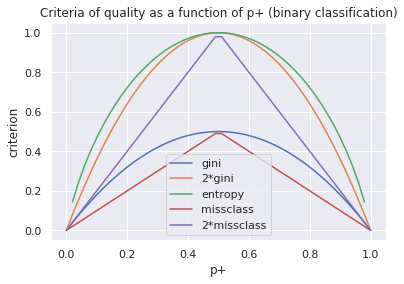

In [2]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()
plt.show()

## Boundary Classification

Let's consider the decision tree to some synthetic data. We will generate from two classes, both normal distributions with different means.

In [4]:
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [6]:
print(1)

1
